In [1]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np

# set font
import matplotlib as mpl

# for Mac
mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
# mpl.rc('font',family='MS Gothic')


千葉県の 1km メッシュ グリッド (4 つ)





➡️ 39 高知県 

➡️ M4932, M5032, M5033, M5034 

➡️ 新しいフォルダー【data】を作成

➡️ ダウンロードしたファイル[SDDSW5239.zip, SDDSW5240.zip, SDDSW5339.zip, SDDSW5340.zip,]を data フォルダーに移動

In [4]:
kouchimesh1 = gpd.read_file('data2/SDDSWS4932')
kouchimesh2 = gpd.read_file('data2/SDDSWS5032')
kouchimesh3 = gpd.read_file('data2/SDDSWS5033')
kouchimesh4 = gpd.read_file('data2/SDDSWS5034')


### 四つのファイルを統合する

<img src='https://github.com/okazama/GIS/blob/main/kouchi.png' width=600>



In [5]:
# combine all four mesh shapes
kouchimesh = gpd.pd.concat([kouchimesh1,kouchimesh2,kouchimesh3,kouchimesh4])

<Axes: >

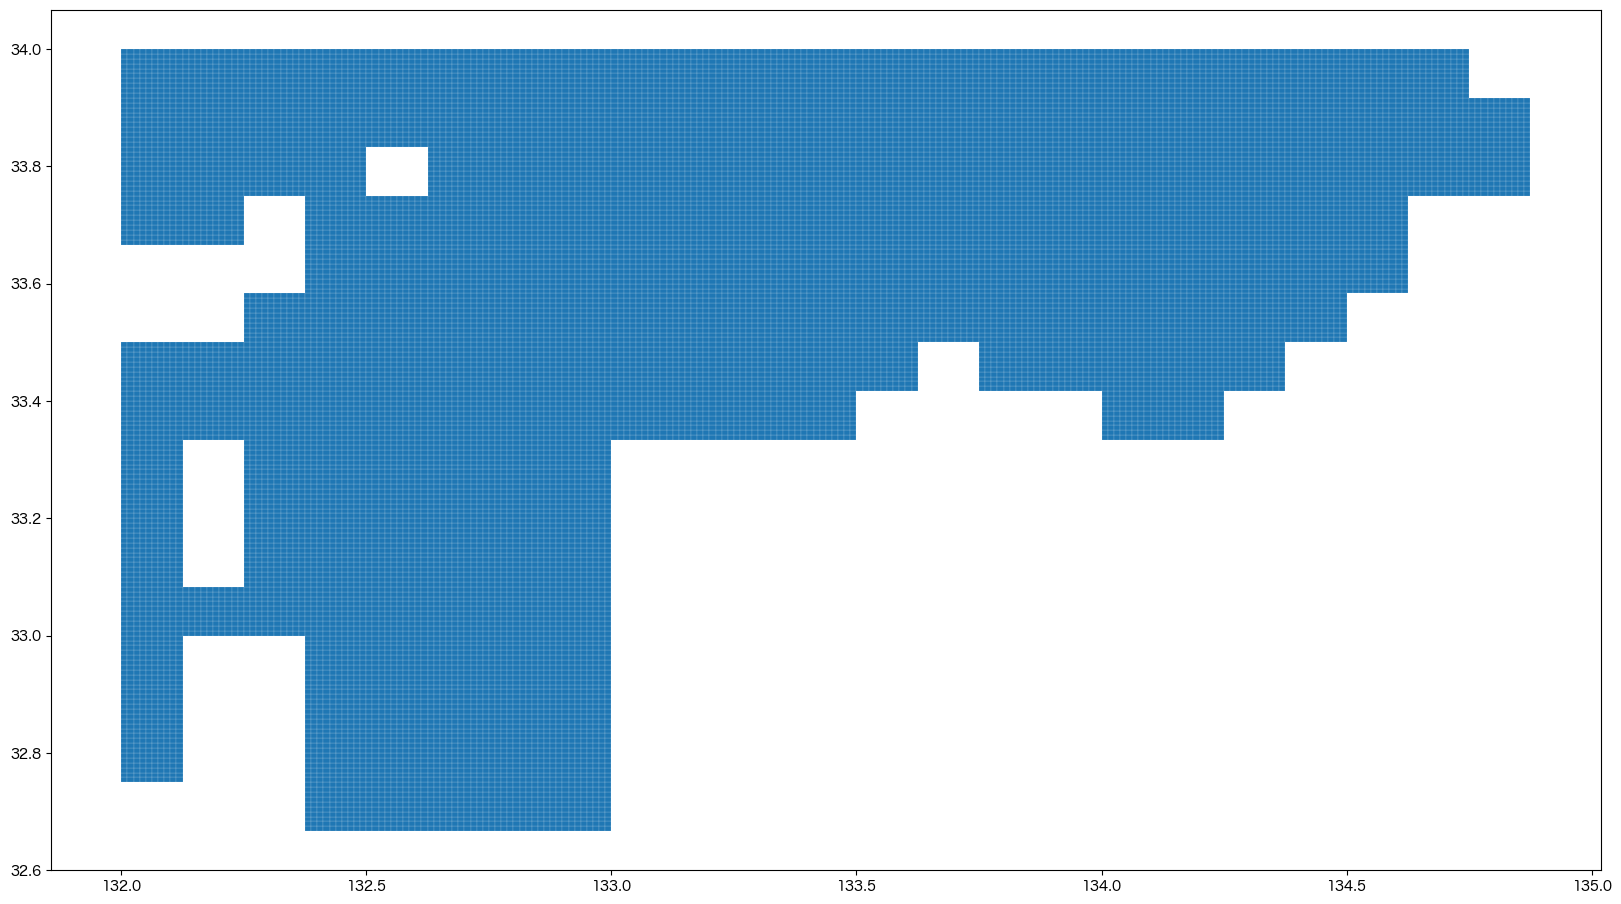

In [6]:
# quick plot
kouchimesh.plot(figsize=(20,20),edgecolor='white',linewidth=0.1)

In [7]:
kouchidata1 = pd.read_csv('data2/tblT001100S4932', encoding='cp932')
kouchidata2 = pd.read_csv('data2/tblT001100S5032', encoding='cp932')
kouchidata3 = pd.read_csv('data2/tblT001100S5033', encoding='cp932')
kouchidata4 = pd.read_csv('data2/tblT001100S5034', encoding='cp932')

### 定義書を確認

<img src="https://github.com/okazama/GIS/blob/main/T001100.pdf">

In [8]:
# check data
kouchidata1.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
0,NaN,NaN,NaN,NaN,人口（総数）,人口（総数） 男,人口（総数） 女,０～１４歳人口 総数,０～１４歳人口 男,０～１４歳人口 女,...,６人世帯数 一般世帯数,７人以上世帯数 一般世帯数,親族のみの世帯数 一般世帯数,核家族世帯数 一般世帯数,核家族以外の世帯数 一般世帯数,６歳未満世帯員のいる世帯数 一般世帯数,６５歳以上世帯員のいる世帯数 一般世帯数,世帯主の年齢が２０～２９歳の１人世帯数 一般世帯数,高齢単身世帯数 一般世帯数,高齢夫婦世帯数 一般世帯数
1,49320453.0,0.0,NaN,NaN,8,4,4,0,0,0,...,0,0,3,3,0,0,4,0,1,1
2,49320454.0,1.0,NaN,49320464,42,19,23,6,2,4,...,0,0,15,15,0,2,21,0,9,10
3,49320464.0,2.0,49320454.0,NaN,5,2,3,*,*,*,...,*,*,*,*,*,*,*,*,*,*
4,49320465.0,1.0,NaN,49320475,8,4,4,0,0,0,...,0,0,5,4,1,0,6,0,1,3


In [9]:
kouchidata1[1:]

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,49320453.0,0.0,NaN,NaN,8,4,4,0,0,0,...,0,0,3,3,0,0,4,0,1,1
2,49320454.0,1.0,NaN,49320464,42,19,23,6,2,4,...,0,0,15,15,0,2,21,0,9,10
3,49320464.0,2.0,49320454.0,NaN,5,2,3,*,*,*,...,*,*,*,*,*,*,*,*,*,*
4,49320465.0,1.0,NaN,49320475,8,4,4,0,0,0,...,0,0,5,4,1,0,6,0,1,3
5,49320473.0,2.0,49320483.0,NaN,3,1,2,*,*,*,...,*,*,*,*,*,*,*,*,*,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,49327794.0,2.0,49327795.0,NaN,7,3,4,*,*,*,...,*,*,*,*,*,*,*,*,*,*
1363,49327795.0,1.0,NaN,49327794,17,9,8,0,0,0,...,0,0,10,10,0,0,12,0,2,8
1364,49327796.0,1.0,NaN,49327797,48,19,29,3,1,2,...,0,0,16,13,3,2,23,0,11,8
1365,49327797.0,2.0,49327796.0,NaN,3,2,1,*,*,*,...,*,*,*,*,*,*,*,*,*,*


In [10]:
kouchidata1=kouchidata1[1:]

In [11]:
kouchidata2=kouchidata2[1:]
kouchidata3=kouchidata3[1:]
kouchidata4=kouchidata4[1:]

In [12]:
kouchidata1=kouchidata1.replace('*',np.nan)
kouchidata2=kouchidata2.replace('*',np.nan)
kouchidata3=kouchidata3.replace('*',np.nan)
kouchidata4=kouchidata4.replace('*',np.nan)

In [13]:
kouchidata = pd.concat([kouchidata1,kouchidata2,kouchidata3,kouchidata4])

In [14]:
# check data info
kouchidata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7100 entries, 1 to 1083
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    7100 non-null   float64
 1   HTKSYORI    7100 non-null   float64
 2   HTKSAKI     1680 non-null   float64
 3   GASSAN      1179 non-null   object 
 4   T001100001  7100 non-null   object 
 5   T001100002  7100 non-null   object 
 6   T001100003  7100 non-null   object 
 7   T001100004  5420 non-null   object 
 8   T001100005  5420 non-null   object 
 9   T001100006  5420 non-null   object 
 10  T001100007  5420 non-null   object 
 11  T001100008  5420 non-null   object 
 12  T001100009  5420 non-null   object 
 13  T001100010  5420 non-null   object 
 14  T001100011  5420 non-null   object 
 15  T001100012  5420 non-null   object 
 16  T001100013  5420 non-null   object 
 17  T001100014  5420 non-null   object 
 18  T001100015  5420 non-null   object 
 19  T001100016  5420 non-null   obje

In [15]:
kouchidata.columns

Index(['KEY_CODE', 'HTKSYORI', 'HTKSAKI', 'GASSAN', 'T001100001', 'T001100002',
       'T001100003', 'T001100004', 'T001100005', 'T001100006', 'T001100007',
       'T001100008', 'T001100009', 'T001100010', 'T001100011', 'T001100012',
       'T001100013', 'T001100014', 'T001100015', 'T001100016', 'T001100017',
       'T001100018', 'T001100019', 'T001100020', 'T001100021', 'T001100022',
       'T001100023', 'T001100024', 'T001100025', 'T001100026', 'T001100027',
       'T001100028', 'T001100029', 'T001100030', 'T001100031', 'T001100032',
       'T001100033', 'T001100034', 'T001100035', 'T001100036', 'T001100037',
       'T001100038', 'T001100039', 'T001100040', 'T001100041', 'T001100042',
       'T001100043', 'T001100044', 'T001100045', 'T001100046', 'T001100047',
       'T001100048', 'T001100049', 'T001100050'],
      dtype='object')

In [16]:
kouchidata.columns[4:]

Index(['T001100001', 'T001100002', 'T001100003', 'T001100004', 'T001100005',
       'T001100006', 'T001100007', 'T001100008', 'T001100009', 'T001100010',
       'T001100011', 'T001100012', 'T001100013', 'T001100014', 'T001100015',
       'T001100016', 'T001100017', 'T001100018', 'T001100019', 'T001100020',
       'T001100021', 'T001100022', 'T001100023', 'T001100024', 'T001100025',
       'T001100026', 'T001100027', 'T001100028', 'T001100029', 'T001100030',
       'T001100031', 'T001100032', 'T001100033', 'T001100034', 'T001100035',
       'T001100036', 'T001100037', 'T001100038', 'T001100039', 'T001100040',
       'T001100041', 'T001100042', 'T001100043', 'T001100044', 'T001100045',
       'T001100046', 'T001100047', 'T001100048', 'T001100049', 'T001100050'],
      dtype='object')

In [17]:
kouchidata[kouchidata.columns[4:]]

,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,T001100007,T001100008,T001100009,T001100010,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,8,4,4,0,0,0,8,4,4,3,...,0,0,3,3,0,0,4,0,1,1
2,42,19,23,6,2,4,41,19,22,12,...,0,0,15,15,0,2,21,0,9,10
3,5,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,4,4,0,0,0,14,8,6,4,...,0,0,5,4,1,0,6,0,1,3
5,3,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,594,298,296,58,35,23,527,257,270,339,...,6,3,181,150,31,11,119,3,16,39
1080,1410,685,725,133,69,64,1274,613,661,852,...,9,1,440,382,58,33,273,4,58,94
1081,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1082,555,266,289,61,30,31,494,236,258,279,...,3,4,125,100,25,23,88,8,18,22


In [18]:
kouchidata[kouchidata.columns[4:]].astype(float)

,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,T001100007,T001100008,T001100009,T001100010,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,8.0,4.0,4.0,0.0,0.0,0.0,8.0,4.0,4.0,3.0,...,0.0,0.0,3.0,3.0,0.0,0.0,4.0,0.0,1.0,1.0
2,42.0,19.0,23.0,6.0,2.0,4.0,41.0,19.0,22.0,12.0,...,0.0,0.0,15.0,15.0,0.0,2.0,21.0,0.0,9.0,10.0
3,5.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.0,4.0,4.0,0.0,0.0,0.0,14.0,8.0,6.0,4.0,...,0.0,0.0,5.0,4.0,1.0,0.0,6.0,0.0,1.0,3.0
5,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,594.0,298.0,296.0,58.0,35.0,23.0,527.0,257.0,270.0,339.0,...,6.0,3.0,181.0,150.0,31.0,11.0,119.0,3.0,16.0,39.0
1080,1410.0,685.0,725.0,133.0,69.0,64.0,1274.0,613.0,661.0,852.0,...,9.0,1.0,440.0,382.0,58.0,33.0,273.0,4.0,58.0,94.0
1081,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1082,555.0,266.0,289.0,61.0,30.0,31.0,494.0,236.0,258.0,279.0,...,3.0,4.0,125.0,100.0,25.0,23.0,88.0,8.0,18.0,22.0


In [19]:
kouchidata[kouchidata.columns[4:]]=kouchidata[kouchidata.columns[4:]].astype(float)

In [20]:
kouchidata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7100 entries, 1 to 1083
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    7100 non-null   float64
 1   HTKSYORI    7100 non-null   float64
 2   HTKSAKI     1680 non-null   float64
 3   GASSAN      1179 non-null   object 
 4   T001100001  7100 non-null   float64
 5   T001100002  7100 non-null   float64
 6   T001100003  7100 non-null   float64
 7   T001100004  5420 non-null   float64
 8   T001100005  5420 non-null   float64
 9   T001100006  5420 non-null   float64
 10  T001100007  5420 non-null   float64
 11  T001100008  5420 non-null   float64
 12  T001100009  5420 non-null   float64
 13  T001100010  5420 non-null   float64
 14  T001100011  5420 non-null   float64
 15  T001100012  5420 non-null   float64
 16  T001100013  5420 non-null   float64
 17  T001100014  5420 non-null   float64
 18  T001100015  5420 non-null   float64
 19  T001100016  5420 non-null   floa

In [21]:
kouchimesh['KEY_CODE']=kouchimesh['KEY_CODE'].astype(float)

In [22]:
kouchimesh = kouchimesh.merge(kouchidata, on='KEY_CODE')

In [23]:
kouchimesh.sample(5)

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry,HTKSYORI,HTKSAKI,GASSAN,T001100001,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
470,49323719.0,4932,37,19,2220,"POLYGON ((133.00000 32.92500, 132.98750 32.925...",0.0,NaN,NaN,10.0,...,0.0,0.0,3.0,3.0,0.0,0.0,4.0,0.0,1.0,1.0
2242,50322551.0,5032,25,51,1952,"POLYGON ((132.65000 33.54167, 132.63750 33.541...",0.0,NaN,NaN,967.0,...,8.0,3.0,278.0,244.0,34.0,31.0,171.0,8.0,34.0,57.0
735,49325411.0,4932,54,11,3412,"POLYGON ((132.52500 33.09167, 132.51250 33.091...",0.0,NaN,NaN,66.0,...,0.0,1.0,20.0,14.0,6.0,1.0,15.0,0.0,4.0,3.0
3587,50330087.0,5033,00,87,88,"POLYGON ((133.10000 33.40000, 133.08750 33.400...",0.0,NaN,NaN,10.0,...,0.0,0.0,4.0,3.0,1.0,0.0,4.0,0.0,0.0,2.0
2504,50323604.0,5032,36,04,2505,"POLYGON ((132.81250 33.58333, 132.80000 33.583...",1.0,NaN,50323605,19.0,...,0.0,0.0,7.0,5.0,2.0,0.0,6.0,0.0,3.0,0.0


In [24]:
# reproject to 3857 (web mercator)
kouchimesh = kouchimesh.to_crs(3857)

<Axes: >

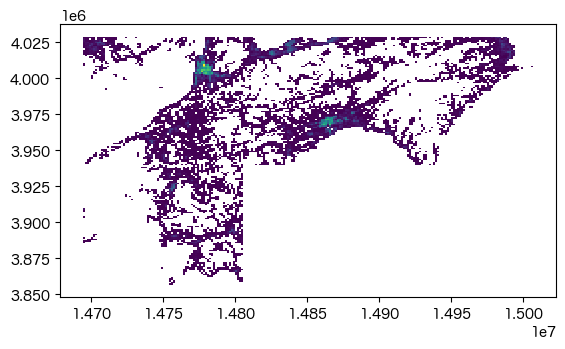

In [25]:
# make a quick plot
kouchimesh.plot(column='T001100001')